## KNN для классификации

In [310]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [340]:
X, y = make_classification(n_samples=30, n_features=2, n_informative=2,n_clusters_per_class=1, n_classes=3,n_redundant=0, random_state=2)

In [341]:
X,y

(array([[-0.85283113,  1.51612597],
        [-0.49258039, -0.73974388],
        [ 1.25679854,  1.36013575],
        [-1.32832527, -1.0510974 ],
        [ 0.58192304,  0.51778523],
        [ 0.96481663,  1.00597333],
        [ 2.11740516,  2.61098766],
        [-0.55510804, -0.02957938],
        [-0.27464558, -1.55422419],
        [ 2.02099437,  0.48101696],
        [-1.41243452,  0.99091511],
        [ 1.7670951 , -0.74752753],
        [ 1.43599141,  1.66262183],
        [ 1.3836719 , -0.54427579],
        [ 1.64674418, -2.15773007],
        [ 0.20144672, -1.46834485],
        [-0.91546726,  0.27739936],
        [ 1.24882902,  1.58098379],
        [ 1.40023658, -0.95354215],
        [-1.87364015,  1.55121352],
        [ 0.38245017, -1.11915363],
        [ 0.47377752,  0.2201325 ],
        [ 1.46943277, -0.97741254],
        [-0.61949925,  1.47597438],
        [-0.61033686,  1.03119542],
        [ 0.48673953,  0.19826591],
        [-0.01182754, -0.34433096],
        [ 1.60416902,  2.244

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10)

In [343]:
X_test

array([[-0.61949925,  1.47597438],
       [ 1.24882902,  1.58098379],
       [-0.61033686,  1.03119542],
       [-0.84179825,  0.15022668],
       [ 1.7670951 , -0.74752753],
       [-0.01182754, -0.34433096],
       [ 0.47377752,  0.2201325 ],
       [ 0.96481663,  1.00597333],
       [-0.49258039, -0.73974388],
       [ 1.25679854,  1.36013575]])

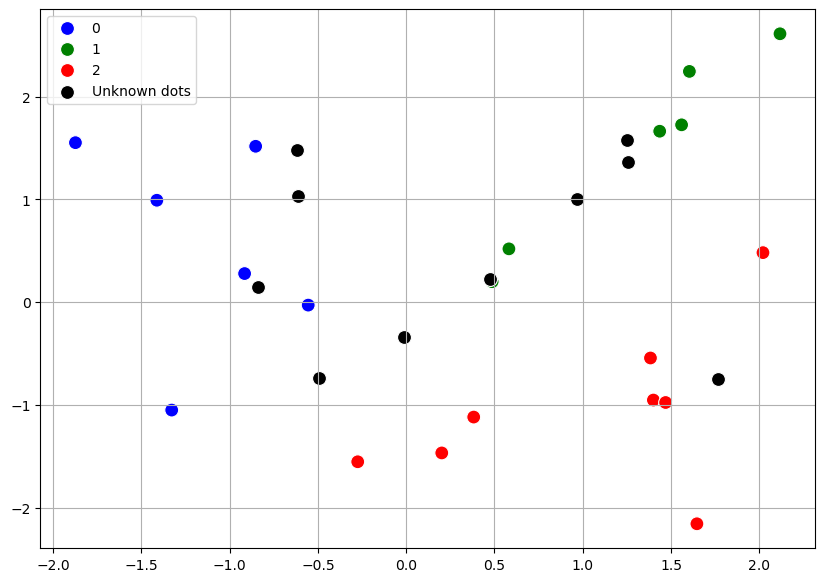

In [344]:
plt.figure(figsize=(10, 7))
plt.grid()
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                palette=['blue', 'green', 'red'],
                markers='o',
                s=100)
sns.scatterplot(x=X_test[: , 0],
                y=X_test[: , 1],
                c='k',
                s=100, label='Unknown dots');

**Обучение**

In [345]:
from sklearn.neighbors import KNeighborsClassifier

In [346]:
k = 3

model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [347]:
pred = model.predict(X_test)
display(pred, y_test)

array([0, 1, 0, 0, 2, 0, 1, 1, 0, 1])

array([0, 1, 0, 0, 2, 2, 1, 1, 0, 1])

**Детали получения предсказания**

In [348]:
test_dot = X_test[0]
test_dot

array([-0.61949925,  1.47597438])

Предсказание:
1. Пройтись по всем обучающим объектам
2. Посчитать Евклидово расстояние между точкой которую хотим предиктить и всеми точками в тренировочной выборке
3. Из списка подсчитанных значений расстояния выброть k ближайших, то есть 3 первых значения в отсортированной по возрастанию выборке

Евклидово расстояние между двумя точками в двумерной плоскости $p$ и $q$: \
$d = \sqrt{(p_0-q_0)^2+(p_1 - p_1)^2}$\
Корень из гипотенузы / Теорема Пифагора

In [349]:
distances_list = []
for i, train_dot in enumerate(X_train):
    distances_list.append({'train_ind': i, 'distance': np.linalg.norm(train_dot - test_dot)})

distances = pd.DataFrame(distances_list)

In [350]:
distances.sort_values(by='distance').head(k)

,train_ind,distance
5,5,0.236761
8,8,0.929532
6,6,1.234577


In [351]:
nearest_neigbors_index = distances.sort_values(by='distance').head(k).index
nearest_neigbors_index

Index([5, 8, 6], dtype='int64')

In [352]:
X_train[nearest_neigbors_index]

array([[-0.85283113,  1.51612597],
       [-1.41243452,  0.99091511],
       [-0.91546726,  0.27739936]])

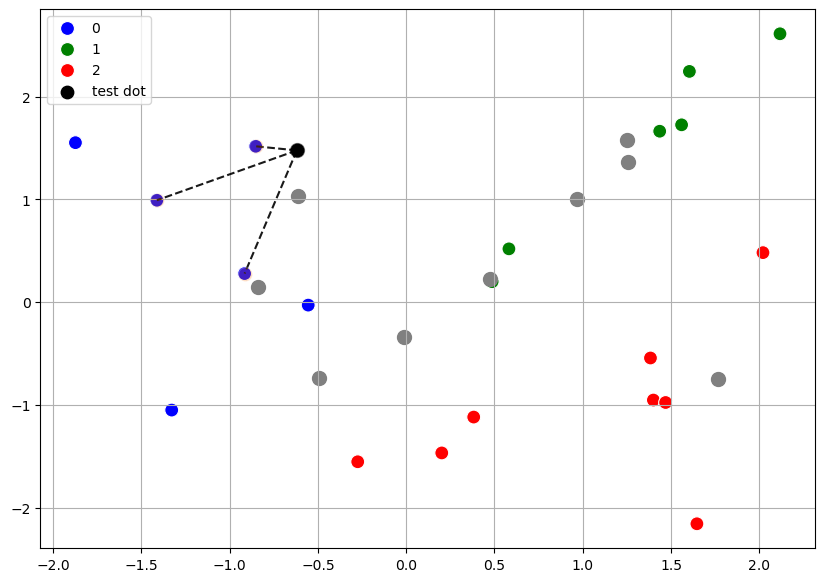

In [358]:
plt.figure(figsize=(10, 7))
plt.grid()
# Все точки
sns.scatterplot(x=X_train[:, 0],
               y=X_train[:, 1],
               s=100,
               zorder=1,
               hue=y_train,
               palette=['blue', 'green', 'red'])

# Соединяющие линии
for x, y in X_train[nearest_neigbors_index]:
    plt.plot([test_dot[0], x], [test_dot[1], y], 
             c='k', 
             linestyle='--', 
             alpha=0.9, 
             zorder=2)

# Соседи
sns.scatterplot(x=X_train[nearest_neigbors_index, 0],
               y=X_train[nearest_neigbors_index, 1],
               alpha=0.25,
               s=100,
                zorder=3)
# Тестовая точка
plt.scatter(test_dot[0], test_dot[1],
            s=80, 
            c='k', 
            zorder=4,
            label='test dot')
plt.scatter(X_test[:, 0], y=X_test[:, 1], c='gray', s=100)
plt.legend();

## KNN для регрессии